In [2]:
import scanpy

In [28]:
import numpy as np

In [3]:
data_files = !find 'output/datasets/predict_modality/' -type f -name '*train*h5ad'

In [4]:
data = {}
for filename in data_files:
    data[filename.split('/')[-1]] = scanpy.read_h5ad(filename)

In [5]:
protein_data = data['openproblems_bmmc_cite_phase1_mod2.censor_dataset.output_train_mod1.h5ad']

In [6]:
gene_data = data['openproblems_bmmc_cite_phase1_mod2.censor_dataset.output_train_mod2.h5ad']

In [11]:
atac_data = data['openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_train_mod1.h5ad']

In [13]:
from matplotlib import pyplot as plt

## ATAC data

In [17]:
atac_means = atac_data.X.mean(axis=0)

0.0007929729 0.5060997


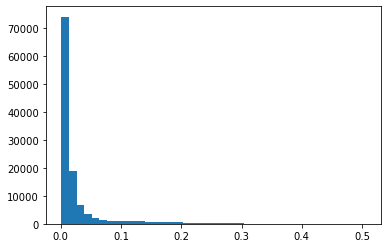

In [22]:
plt.hist(atac_means.T, bins=40)
print(atac_means.min(), atac_means.max())

In [54]:
atac_data.X.count_nonzero()/(atac_data.shape[0]*atac_data.shape[1])

0.025700124916673082

In [64]:
atac_data.X[:10,:10].todense()

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## Protein Data

In [30]:
protein_dist = protein_data.X.reshape((-1,1)).todense()

0.6774877 [[0.5082029]]
0.0 [[7.514117]]


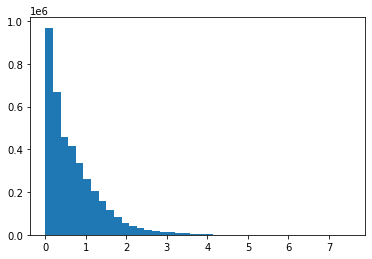

In [39]:
_=plt.hist(protein_dist, bins=40)
print(protein_dist.mean(), np.median(protein_dist,axis=0))
print(protein_dist.min(), np.max(protein_dist,axis=0))

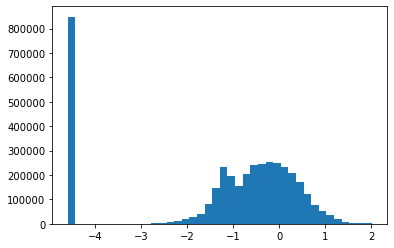

In [55]:
_=plt.hist(np.log(.01+protein_dist),bins=40)

In [41]:
np.log(.01)

-4.605170185988091

In [53]:
protein_data.X.count_nonzero()/(protein_data.shape[0]*protein_data.shape[1])

0.7821774300762926

## Gene Data

In [42]:
gene_dist = gene_data.X.reshape((-1,1)).todense()

In [44]:
gene_dist.shape

(405711381, 1)

0.10704467 [[0.]]
0.0 [[14.102308]]


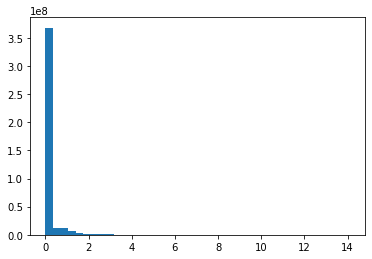

In [46]:
_=plt.hist(gene_dist, bins=40)
print(gene_dist.mean(), np.median(gene_dist,axis=0))
print(gene_dist.min(), np.max(gene_dist,axis=0))

In [65]:
import scipy

In [75]:
gene_nz = gene_data.X[gene_data.X.nonzero()]

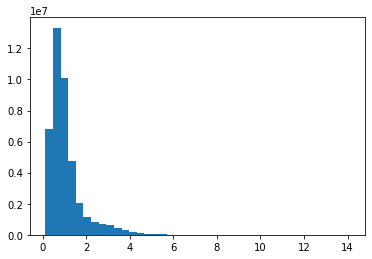

In [80]:
_=plt.hist(gene_nz.T, bins=40)

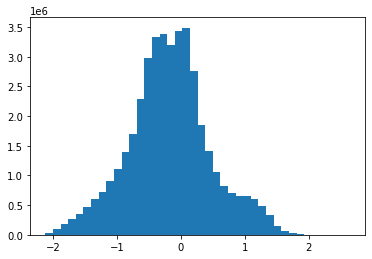

In [81]:
_=plt.hist(np.log(gene_nz.T), bins=40)

In [48]:
gene_data.X.count_nonzero()

41509445

In [49]:
gene_data.shape[0]*gene_data.shape[1]

405711381

In [52]:
gene_data.X.count_nonzero()/(gene_data.shape[0]*gene_data.shape[1])

0.1023127448327608

In [ ]:
gene_means

## Protein-gene connectivity

In [124]:
import pickle

In [134]:
gene_name_protein = pickle.load(open('input/gene_name_proteins.pickle','rb'))

In [135]:
gene_protein = pickle.load(open('input/gene_protein_association.pickle','rb'))

In [173]:
# TODO why are genes without ('gene', ENSG...) in gene_protein?
# possibly because gene_protein was a defaultdict? Changed in input_data_prep, so maybe fixed

In [154]:
protein_gene = {}
for protein in protein_data.var.index.to_list():
    for gene_name in gene_name_protein[protein.upper()]:
        protein_gene[gene_name] = protein

In [160]:
from collections import Counter, defaultdict

In [163]:
gene_protein_matched = defaultdict(set)
for gene in gene_data.var['gene_ids'].to_list():
    for protein in gene_protein[('gene',gene)]:
        if protein in protein_gene:
            gene_protein_matched[protein_gene[protein]].add(gene)
                        

In [172]:
[(protein_name, len(genes)) for protein_name, genes in gene_protein_matched.items()]

[('CD134', 1),
 ('CD270', 1),
 ('CD137', 1),
 ('CD52', 1),
 ('CD58', 1),
 ('CD2', 1),
 ('CD101', 1),
 ('CD64', 1),
 ('CD1d', 1),
 ('CD1c', 1),
 ('FceRIa', 1),
 ('CD352', 1),
 ('CD48', 1),
 ('CD319', 1),
 ('CD244', 1),
 ('CD32', 2),
 ('CD16', 1),
 ('CD62L', 1),
 ('CD45', 1),
 ('CD21', 1),
 ('CD35', 1),
 ('CD8', 2),
 ('CD26', 1),
 ('CD49f', 1),
 ('CD49d', 1),
 ('CD28', 1),
 ('CD152', 1),
 ('CD278', 1),
 ('CD194', 1),
 ('CX3CR1', 1),
 ('CD192', 1),
 ('CD195', 1),
 ('CD47', 1),
 ('CD272', 1),
 ('TIGIT', 1),
 ('CD86', 1),
 ('CD71', 1),
 ('CD38', 1),
 ('CD127', 1),
 ('CD49a', 1),
 ('CD14', 1),
 ('CD115', 1),
 ('CD83', 1),
 ('HLA-E', 1),
 ('HLA-A-B-C', 2),
 ('HLA-DR', 2),
 ('CD73', 1),
 ('CD24', 1),
 ('CD119', 1),
 ('CD196', 1),
 ('CD36', 1),
 ('CD72', 1),
 ('CD105', 1),
 ('CD25', 2),
 ('CD29', 1),
 ('CD304', 1),
 ('CD95', 1),
 ('CD39', 1),
 ('CD81', 1),
 ('CD44', 1),
 ('CD82', 1),
 ('CD20', 1),
 ('CD5', 1),
 ('CD56', 1),
 ('CD3', 3),
 ('CD185', 1),
 ('CD9', 1),
 ('CD27', 1),
 ('CD223', 1),
 

In [169]:
len(gene_protein_matched)

114

In [170]:
len(protein_ids)

134

114/134 of the proteins have corresponding genes in the gene expression dataset

There's no way to connect these to data except through second order connections (protein-protein, etc)